In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [24]:
df=pd.read_csv('data/Student.csv')

In [25]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# inndependent and dependent feature

In [26]:
X=df.drop(columns=['math score'],axis=1)

In [27]:
y=df['math score']

In [28]:
#creating the pipeline
num_feature=X.select_dtypes(exclude="object").columns
cat_feature=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer= StandardScaler()
oh_transformer=OneHotEncoder()


preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_feature),
        ("StandardScaler", num_transformer, num_feature),
    ]
)

In [29]:
X = preprocessor.fit_transform(X)

In [30]:
X #by above you can see that it has happend both ohe also and after ohe autometically scaling between an perticular range

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
X_train.shape ,X_test.shape

((800, 19), (200, 19))

In [33]:
def evalution_metrics(true, predicted):
    mae=mean_absolute_error(true, predicted)
    mse=mean_squared_error(true,predicted)
    rsme=np.sqrt(mean_squared_error(true, predicted))
    r2_scoree=r2_score(true, predicted)
    return mae, rsme, r2_scoree


In [42]:
models={
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "Lesso":Lasso(),
    "Rigid":Ridge(),
    "Linear Regression":LinearRegression(),
#     "K-neighbor":KNeighborsRegressor(),
    "XGBoostRegression":XGBRegressor(n_jobs=1),
    "CatboostRegression":CatBoostRegressor(verbose=False),
    "AdaboostRegression":AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)#train model
    
    
    #make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #evalution train and test
    model_train_mae, model_train_rsme, model_train_r2score=evalution_metrics(y_train, y_train_pred)
    model_test_mae, model_test_rsme, model_test_r2score=evalution_metrics(y_test, y_test_pred)
    
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    
#     # check the accuracy of taing set
#     model_acc=accuracy_score(Y_train, y_train_pred)
#     model_f1=f1_score(Y_train, y_train_pred, average='weighted')
#     model_precesion=precision_score(Y_train, y_train_pred)
#     model_recall=recall_score(Y_train, y_train_pred)
#     model_roc=roc_auc_score(Y_train, y_train_pred)
    
#     #testing accuracy
#     model_acc_test=accuracy_score(Y_test, y_test_pred)
#     model_f1_test=f1_score(Y_test, y_test_pred, average='weighted')
#     model_precesion_test=precision_score(Y_test, y_test_pred)
#     model_recall_test=recall_score(Y_test, y_test_pred)
#     model_roc_test=roc_auc_score(Y_test, y_test_pred)
    
    
#     print(list(models.keys())[i])

    print("model performance for training set")
    print("- Root mean squre error: {:.4f}".format(model_train_rsme))
    print("- Mean absolute error: {:.4f}".format(model_train_mae))
    print("- R2_score: {:.4f}".format(model_train_r2score))

    print("---------------------------------------------------------------------------------")
    
    #model accuracy of testing
    print("model performance of testing")
    print("- Root mean squre error: {:.4f}".format(model_test_rsme))
    print("- Mean absolute error: {:.4f}".format(model_test_mae))
    print("- R2_score: {:.4f}".format(model_test_r2score))
    
    r2_list.append(model_test_r2score)
    
    print("="*35)
    print("\n")
    

Decision Tree
model performance for training set
- Root mean squre error: 0.2795
- Mean absolute error: 0.0187
- R2_score: 0.9997
---------------------------------------------------------------------------------
model performance of testing
- Root mean squre error: 7.4723
- Mean absolute error: 5.9750
- R2_score: 0.7705


Random Forest
model performance for training set
- Root mean squre error: 2.2816
- Mean absolute error: 1.8142
- R2_score: 0.9769
---------------------------------------------------------------------------------
model performance of testing
- Root mean squre error: 5.9741
- Mean absolute error: 4.6142
- R2_score: 0.8533


Lesso
model performance for training set
- Root mean squre error: 6.5938
- Mean absolute error: 5.2063
- R2_score: 0.8071
---------------------------------------------------------------------------------
model performance of testing
- Root mean squre error: 6.5197
- Mean absolute error: 5.1579
- R2_score: 0.8253


Rigid
model performance for training

In [44]:
#create an dataframe which shows the no of algorithms having best r2_score
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model_name', 'R2_score']).sort_values(by=["R2_score"], ascending=False)

,Model_name,R2_score
3,Rigid,0.880593
4,Linear Regression,0.880345
1,Random Forest,0.853332
6,CatboostRegression,0.851632
7,AdaboostRegression,0.841901
5,XGBoostRegression,0.827797
2,Lesso,0.825320
0,Decision Tree,0.770546


In [47]:
#we use linier regression model
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train, y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test, y_pred)*100
print("accuracy : %2.f" %score)

accuracy : 88


Text(0, 0.5, 'predicted')

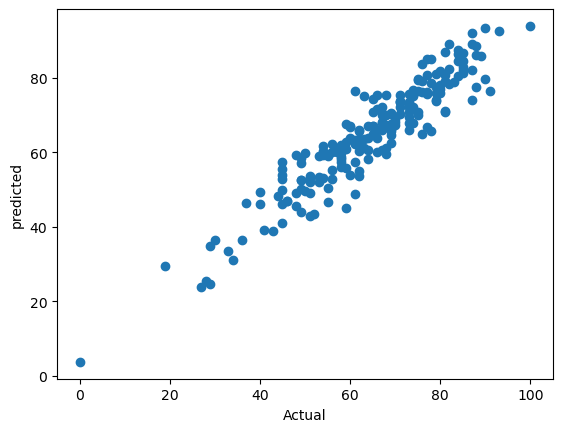

In [48]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')

<Axes: xlabel='math score'>

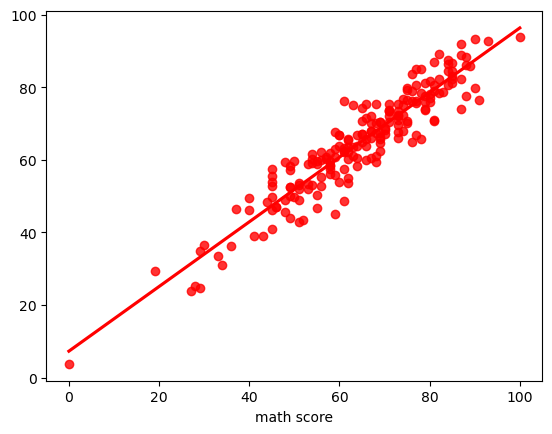

In [49]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [50]:
pred_df=pd.DataFrame({'Actual value':y_test, 'Predicted value':y_test, 'Difference':y_test-y_pred})

In [51]:
pred_df

,Actual value,Predicted value,Difference
521,91,91,14.492188
737,53,53,-5.953125
740,80,80,3.039062
660,74,74,-2.757812
411,84,84,-3.539062
...,...,...,...
408,52,52,8.453125
332,62,62,-0.031250
208,74,74,6.023438
613,65,65,-2.132812
